## 군집 분석(Cluster Analysis)
+ 유사성을 기반으로 군집을 분류한 후, 군집별 특징을 분석하는 방법
+ 자연어처리에서는 최대한 유사한 텍스트들끼리 군집으로 묶고, 다른 군집의 텍스트들과는 최대한 유사하지 않도록 분류

### 텍스트 유사도
+ 텍스트 쌍에 대한 자카드 유사도, 코사인 유사도 계산

`자카드 유사도(Jaccard Similarity)`  
: 두 텍스트 문서 사이의 공통된 고유어 수와, 해당 텍스트에 존재하는 총 고유어 수의 비율 사용  
숫자가 높을수록 유사한 것

`코사인 유사도(Cosine Similarity)`  
: 벡터 표현 사이의 각도에 대한 코사인 값 사용  
BoW, TF-IDF 행렬은 텍스트에 대한 벡터 표현으로 활용 가능

In [1]:
import nltk
#nltk.download('punkt')
#nltk.download('wordnet')
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
#자카드 유사도
def jaccard_sim(d1, d2):
    lm = WordNetLemmatizer()
    
    words1 = [lm.lemmatize(word.lower()) for word in word_tokenize(d1)]
    words2 = [lm.lemmatize(word.lower()) for word in word_tokenize(d2)]
    
    inter = len(set(words1).intersection(set(words2)))  #words1에 존재하는 총 고유어의 개수
    union = len(set(words1).union(set(words2)))         #공통으로 사용된 고유어의 개수
    
    return inter / union

d1 = 'Think like a man of action and act like a man of thought.'
d2 = 'Try not to become a man of success but rather try to become a man of value.'
d3 = 'Give me liberty, or give me death.'

print(jaccard_sim(d1, d2))
print(jaccard_sim(d1, d3))
print(jaccard_sim(d2, d3))

0.2222222222222222
0.0625
0.05555555555555555


In [3]:
#코사인 유사도
import warnings
warnings.filterwarnings(action='ignore')

tfidf = TfidfVectorizer()
corpus = [d1, d2, d3]

tfidf = tfidf.fit_transform(corpus).todense()   #dense matrix

print(cosine_similarity(tfidf[0], tfidf[1]))
print(cosine_similarity(tfidf[0], tfidf[2]))
print(cosine_similarity(tfidf[1], tfidf[2]))

[[0.26953459]]
[[0.]]
[[0.]]


### 네이버 영화 리뷰데이터

In [4]:
import urllib.request

raw = urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt').readlines()
len(raw), raw[:2]

(200001,
 [b'id\tdocument\tlabel\n',
  b'8112052\t\xec\x96\xb4\xeb\xa6\xb4\xeb\x95\x8c\xeb\xb3\xb4\xea\xb3\xa0 \xec\xa7\x80\xea\xb8\x88\xeb\x8b\xa4\xec\x8b\x9c\xeb\xb4\x90\xeb\x8f\x84 \xec\x9e\xac\xeb\xb0\x8c\xec\x96\xb4\xec\x9a\x94\xe3\x85\x8b\xe3\x85\x8b\t1\n'])

In [5]:
decoded_raw = [x.decode() for x in raw[1:]]

reviews = [i.split('\t')[1] for i in decoded_raw]

reviews[:2]    

['어릴때보고 지금다시봐도 재밌어요ㅋㅋ',
 '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.']

In [6]:
from konlpy.tag import Mecab

mecab = Mecab(dicpath=r"C:/mecab/mecab-ko-dic")
reviews_morph = [mecab.morphs(review) for review in reviews]    #리뷰별 형태소 분석

reviews_morph[:2]

[['어릴', '때', '보', '고', '지금', '다시', '봐도', '재밌', '어요', 'ㅋㅋ'],
 ['디자인',
  '을',
  '배우',
  '는',
  '학생',
  '으로',
  ',',
  '외국',
  '디자이너',
  '와',
  '그',
  '들',
  '이',
  '일군',
  '전통',
  '을',
  '통해',
  '발전',
  '해',
  '가',
  '는',
  '문화',
  '산업',
  '이',
  '부러웠',
  '는데',
  '.',
  '사실',
  '우리',
  '나라',
  '에서',
  '도',
  '그',
  '어려운',
  '시절',
  '에',
  '끝',
  '까지',
  '열정',
  '을',
  '지킨',
  '노라노',
  '같',
  '은',
  '전통',
  '이',
  '있',
  '어',
  '저',
  '와',
  '같',
  '은',
  '사람',
  '들',
  '이',
  '꿈',
  '을',
  '꾸',
  '고',
  '이뤄나갈',
  '수',
  '있',
  '다는',
  '것',
  '에',
  '감사',
  '합니다',
  '.']]

In [7]:
#!pip install gensim==3.8.1
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from matplotlib import font_manager as fm
from matplotlib import rc

In [8]:
w2v = Word2Vec(reviews_morph, min_count=5)   #객체 생성, 빈도가 5보다 낮은 단어는 무시 
w2v.wv.most_similar('영화')

[('드라마', 0.6814005374908447),
 ('작품', 0.6133273839950562),
 ('애니', 0.5853114128112793),
 ('다큐', 0.5687400698661804),
 ('스릴러', 0.5626461505889893),
 ('애니메이션', 0.5618516802787781),
 ('장르', 0.5529835224151611),
 ('독립영화', 0.5427454113960266),
 ('수작', 0.5377524495124817),
 ('만화', 0.5265293121337891)]

In [9]:
import gensim
gensim.__version__

'3.8.1'

In [20]:
#TSNE를 이용해 단어 벡터 시각화
import pandas as pd

tsne = TSNE(n_components=2)   #시각화를 위해 2차원으로

print('단어 벡터 총 개수 :', len(w2v.wv.vocab))

vocab = w2v.wv.vocab       #gensim 4.0 이상에서는 사용불가
print(vocab['영화'])

sim = w2v[vocab]
print(sim[0])

transformed_sim = tsne.fit_transform(sim)
df = pd.DataFrame(transformed_sim, index=vocab, columns=['x', 'y'])
df.head()

단어 벡터 총 개수 : 18982
Vocab(count:77222, index:3, sample_int:1127999991)
[-2.2589488e+00 -8.9789706e-01  1.2825512e+00 -7.8453928e-01
 -4.3926916e-01  5.0760901e-01  1.2442318e+00 -3.6773625e-01
  1.6578698e+00  6.0647351e-01 -1.0339390e+00 -1.1588673e-01
  1.2561193e+00 -2.3083773e+00  3.4789550e+00  1.1644480e+00
 -9.9873978e-01 -9.8282224e-01  1.1255027e+00  4.5021677e-01
  1.2777110e+00 -1.4357642e+00  1.7877575e+00 -2.5658066e+00
 -2.1383128e-01 -2.0227437e+00 -2.0702283e+00  3.6671993e-01
 -3.1414640e-01  2.8723028e+00  8.7968194e-01  4.5984954e-01
 -7.4559593e-01 -2.6447747e+00 -5.6629073e-02  1.6378416e+00
 -1.8782117e+00  1.1779387e+00 -1.8368100e-01 -1.6750976e+00
 -1.4617696e+00  9.2188025e-01 -1.4404705e+00  7.6244229e-01
  1.3142421e+00  6.2661719e-01 -1.4911053e+00 -2.9058638e-01
 -1.4203328e+00  6.2435073e-01 -1.2394848e+00  9.5491892e-01
  1.5194936e+00  2.1587408e-01 -3.5514209e-01 -2.1603587e+00
  2.7945977e-01 -1.7702566e+00 -9.0160233e-01  1.2426054e+00
 -2.7507894e+00

,x,y
어릴,-45.965115,27.482580
때,-35.906075,31.051701
보,10.001415,-27.567673
고,-6.773705,-52.510574
지금,-53.524185,2.612156


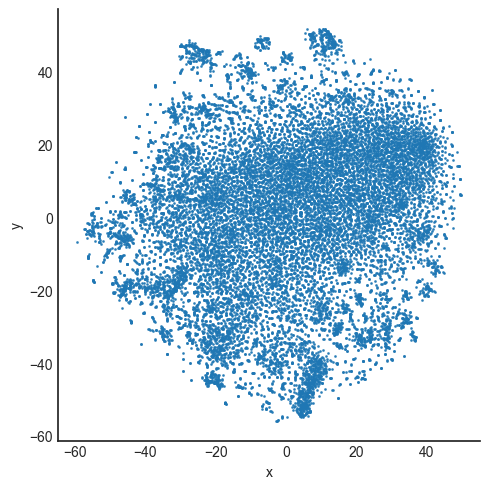

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

sns.lmplot(data=df, x='x', y='y', fit_reg=False, scatter_kws={"s": 1});

### Sklearn, Scipy를 이용한 계층적 군집화
+ 군집수를 지정하지 않아도 군집화 가능
+ 모든 개체간 거리나 유사도가 미리 계산되어 있어야 하며, 계산복잡도도 비계층적 군집화보다 큼

#### 1. Sklearn
+ agglomerativeClustering(병합군집) 사용 가능
+ 각 개체들을 클러스터로 간주하고, 종료 조건을 만족할 때까지 가장 비슷한 두 클러스터들을 합치며 진행
+ 종료조건에는 3가지 지정 가능
    1. ward : (default)모든 클러스터 내 분산을 가장 적게 증가시키는 두 클러스터를 합침
    2. average : 클러스터간 평균거리가 가장 짧은 두 클러스터를 합침
    3. complete : 클러스터간 최대거리가 가장 짧은 두 클러스터를 합침

In [33]:
#종료조건이 ward일 때
from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(n_clusters=6, linkage='ward')

ward_pred = ward.fit_predict(df)

ward_result = df.copy()
ward_result['predict'] = ward_pred

ward_result.head()

,x,y,predict
어릴,-45.965115,27.482580,2
때,-35.906075,31.051701,2
보,10.001415,-27.567673,0
고,-6.773705,-52.510574,5
지금,-53.524185,2.612156,4


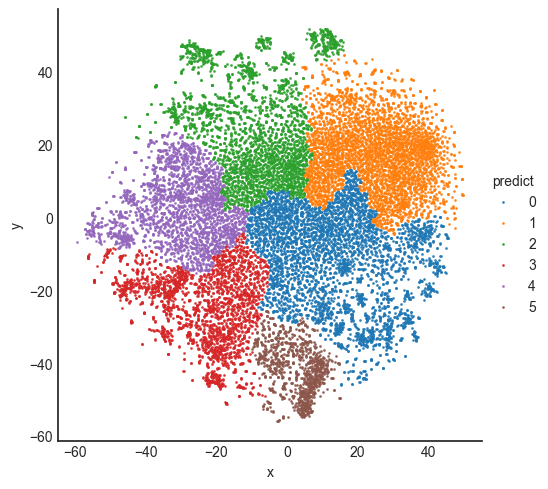

In [35]:
sns.lmplot(data=ward_result, x='x', y='y', 
           fit_reg=False, scatter_kws={"s": 1}, hue='predict');

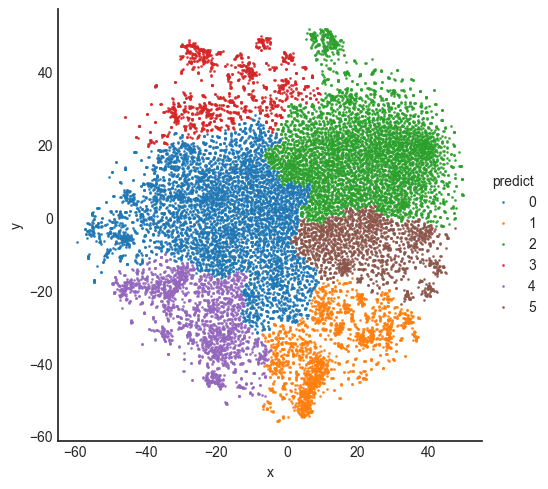

In [36]:
#종료조건이 average일 때

average = AgglomerativeClustering(n_clusters=6, linkage='average')

average_pred = average.fit_predict(df)

average_result = df.copy()
average_result['predict'] = average_pred

sns.lmplot(data=average_result, x='x', y='y', 
           fit_reg=False, scatter_kws={"s": 1}, hue='predict');

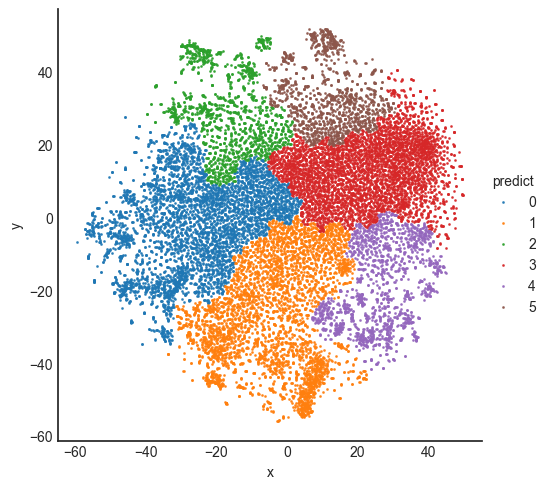

In [37]:
#종료조건이 complete일 때

complete = AgglomerativeClustering(n_clusters=6, linkage='complete')

complete_pred = complete.fit_predict(df)

complete_result = df.copy()
complete_result['predict'] = complete_pred

sns.lmplot(data=complete_result, x='x', y='y', 
           fit_reg=False, scatter_kws={"s": 1}, hue='predict');

#### 2. Scipy
+ scipy를 이용한 거리 vs Word2Vec을 이용한 거리
+ pdist를 이용한 각 단어간 유클리드 거리 계산

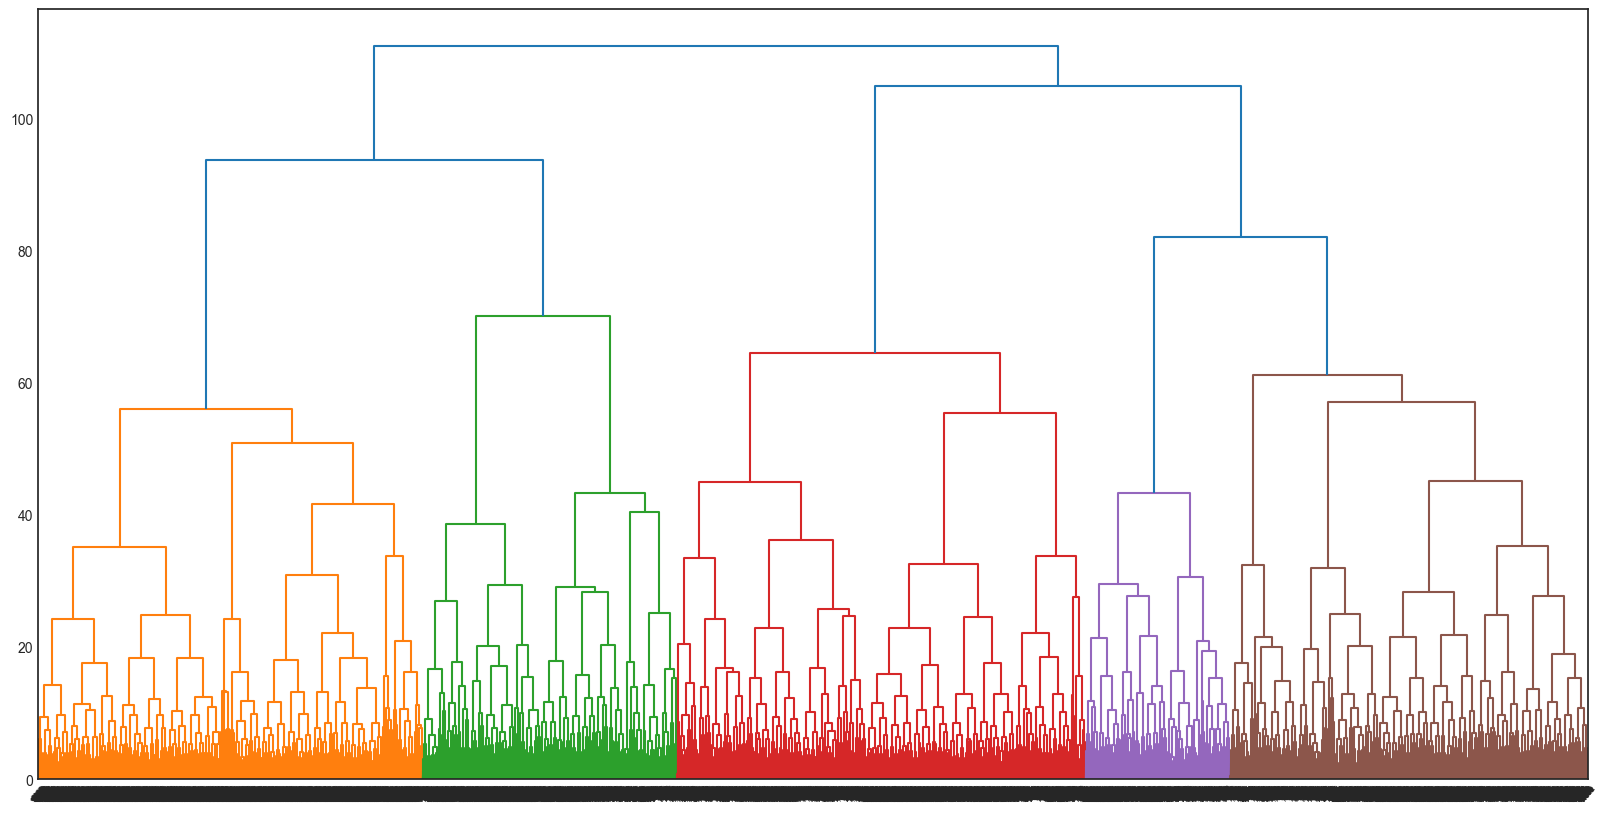

In [56]:
#각 단어간 유클리드 거리를 이용한 군집분석 및 덴드로그램 시각화 => n_clusters 지정 안해도 됨
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

dist_matrix = pdist(df, metric='euclidean')       #(180148671,)
row_dist = pd.DataFrame(squareform(dist_matrix))  #(18982, 18982)

row_clusters = linkage(dist_matrix, method='complete')

plt.figure(figsize=(20,10))
dendrogram(row_clusters, leaf_rotation=50, leaf_font_size=5);

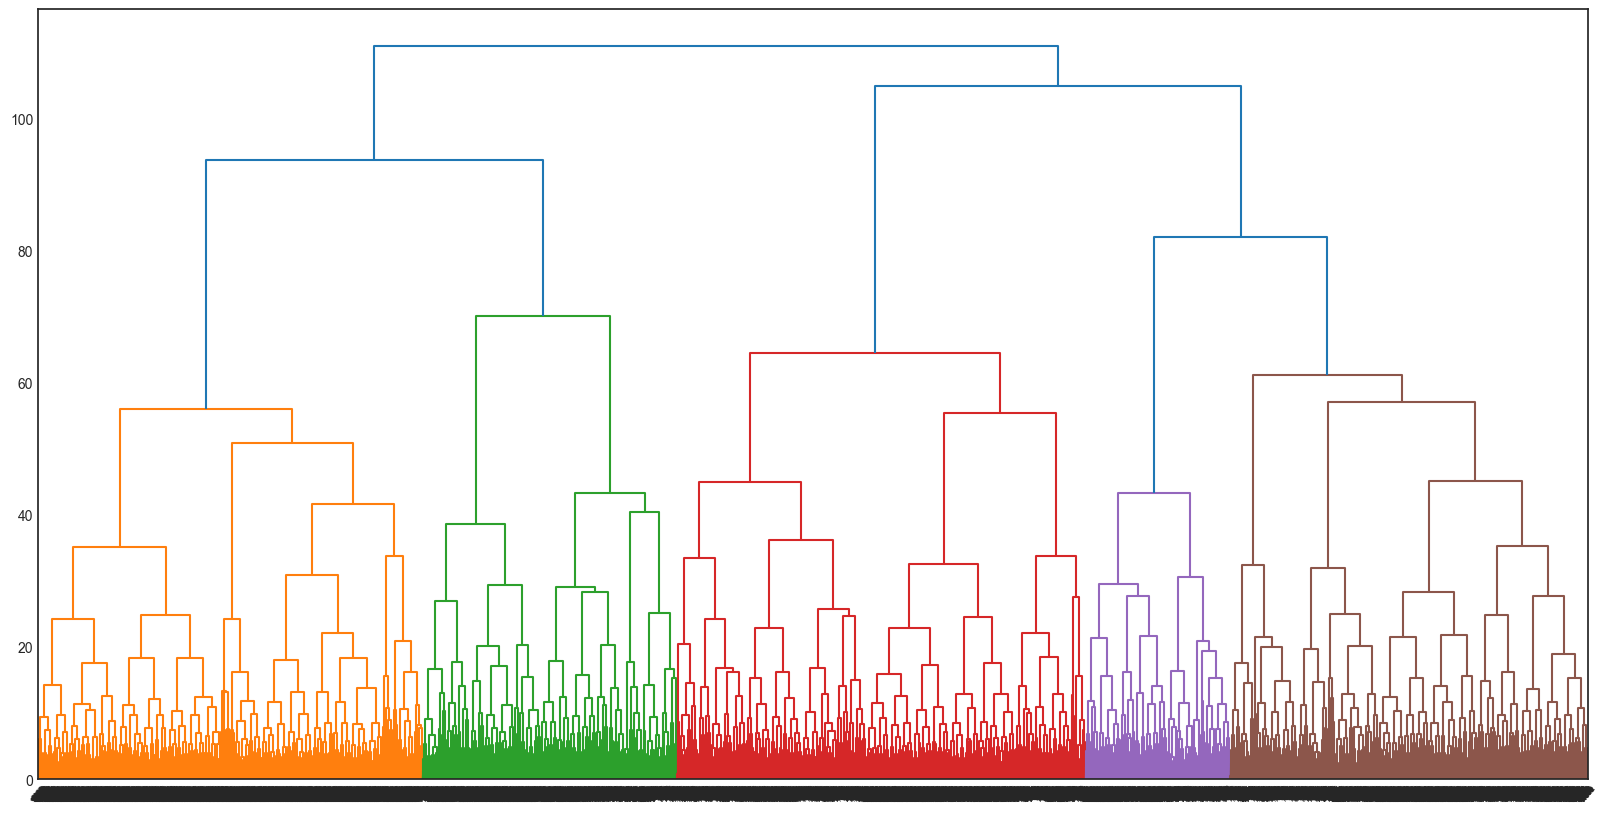

In [55]:
#Word2Vec을 이용한 군집분석 및 덴드로그램 시각화
mergings = linkage(df, method='complete')

plt.figure(figsize=(20,10))
dendrogram(mergings, leaf_rotation=50, leaf_font_size=5);

### Scikit-learn을 이용한 비계층적 군집화
+ 계층적 군집화와 달리, n_clusters를 지정해야 함
+ 계층적 군집화보다 계산 복잡도가 작기 때문에 대량의 데이터에 유리
+ 하지만 n_clusters에 따라 군집화 성능이 크게 달라지므로 조정 필요

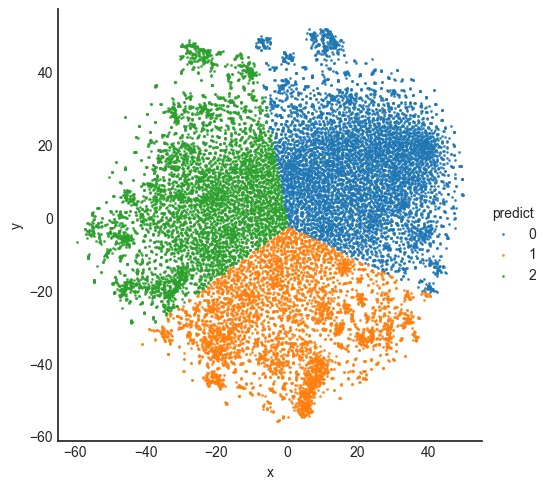

In [57]:
#Kmeans(n_clusters=3)
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
pred = kmeans.fit_predict(df)

result = df.copy()
result['predict'] = pred

sns.lmplot(data=result, x='x', y='y', 
           fit_reg=False, scatter_kws={"s": 1}, hue='predict');

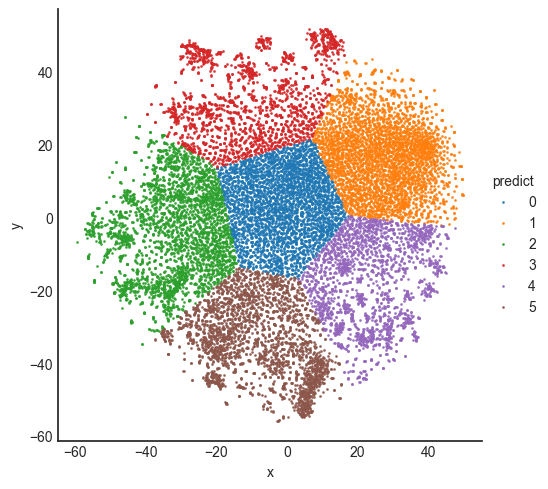

In [58]:
#KMeans(n_clusters=6)
kmeans = KMeans(n_clusters=6)
pred = kmeans.fit_predict(df)

result = df.copy()
result['predict'] = pred

sns.lmplot(data=result, x='x', y='y', 
           fit_reg=False, scatter_kws={"s": 1}, hue='predict');